<a href="https://colab.research.google.com/github/EneasDavid/Ciencia_de_dados/blob/main/2_lista_CD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segunda Lista de Ciencias de dados
================
**Discente:** David Enéas

**Matrícula:** 23110637

**Curso:** Ciência de Computação

# importando as bibliotecas padrão

In [ ]:
%pip install pandas networkx matplotlib

In [ ]:
import gzip
import urllib.request
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import random
from scipy import stats

# 1. Aquisição de Dados e Leitura


Escreva um script em Python que leia o arquivo da rede de e-mails, disponível no seguinte link: https://snap.stanford.edu/data/email-Eu-core-temporal.txt.gz. Este conjunto de dados foi gerado a partir de trocas de e-mails em uma instituição de pesquisa europeia. Para mais informações sobre o conjunto de dados, acesse: https://snap.stanford.edu/data/email-Eu-core-temporal.html. Sugestão: para as questões a seguir, use o pacote NetworkX: https://networkx.org/documentation/stable/index.html.

In [ ]:
# URL da base de dados de e-mails
url = "https://snap.stanford.edu/data/email-Eu-core-temporal.txt.gz"

In [ ]:
# Ler o arquivo como dataframe

'''
source = id do nó de origem (um usuário)
target =  id do nó de destino (um usuário)
timestamp = carimbo de data e hora começando em zero,
'''

# Ler o arquivo como dataframe
email_data = pd.read_csv(url, sep=" ", names=["source", "target", "timestamp"])
email_data.head()

,source,target,timestamp
0,582,364,0
1,168,472,2797
2,168,912,3304
3,2,790,4523
4,2,322,7926


# 2. Visualização da Rede

Desconsiderando o fator temporal, visualize a estrutura da rede social direcionada por meio de um grafo que ilustre sua organização.

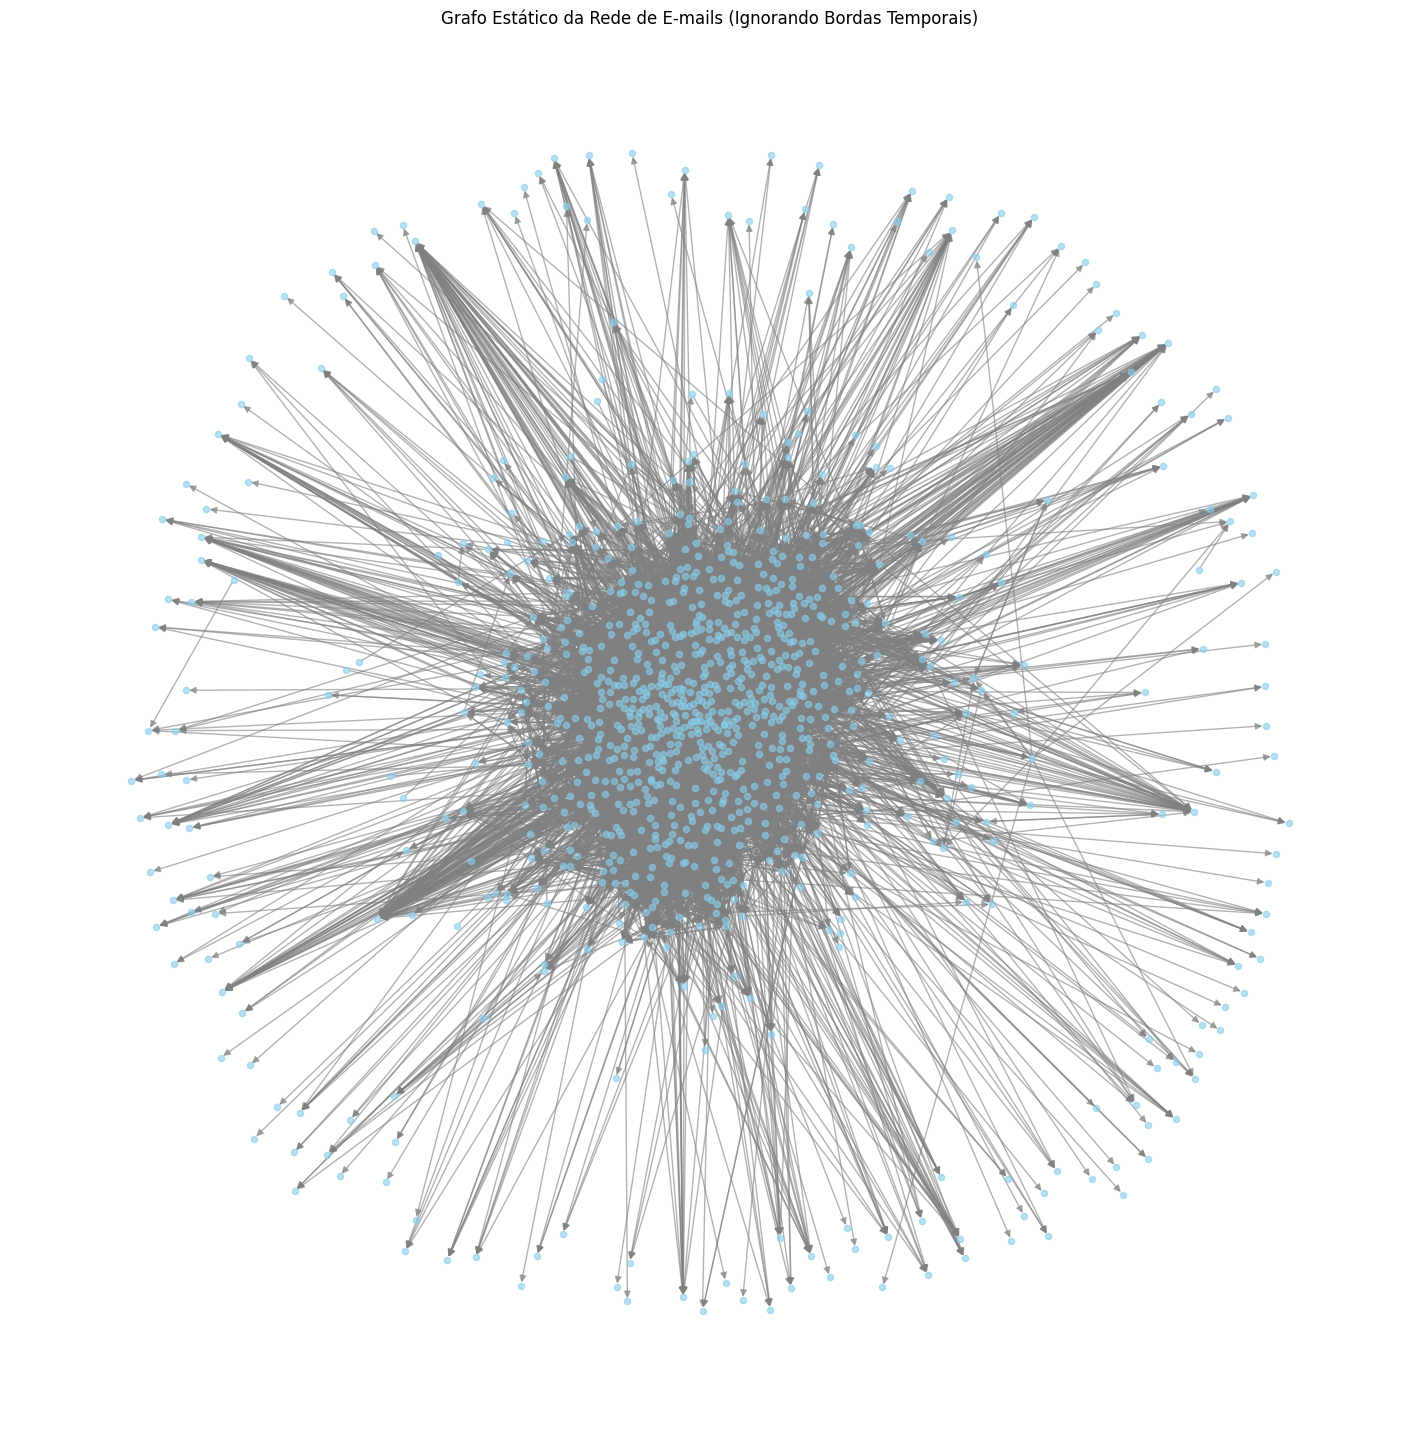

In [ ]:
# Criar um grafo direcionado para o gráfico estático (desconsiderando o tempo)
G = nx.from_pandas_edgelist(email_data, "source", "target", create_using=nx.DiGraph)

# Configurar o layout e visualização
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G, k=0.15)

# Plotar o grafo
nx.draw(
    G, pos, node_size=20, node_color="skyblue", edge_color="gray",
    with_labels=False, alpha=0.6, arrows=True
)
plt.title("Grafo Estático da Rede de E-mails (Ignorando Bordas Temporais)")
plt.show()

# 3. Análise Global

Utilizando ferramentas de análise de redes sociais, calcule a média dos menores caminhos (shortest paths) entre os nós da rede. Com base nesse valor, o que podemos concluir sobre a conectividade e a eficiência da comunicação na rede?

# 4.  Análise Estrutural
Calcule os 5 nós com os maiores valores de Centralidade de Intermediação (Betweenness Centrality). Com base nesses nós, interprete os resultados alinhando o conceito dessa métrica ao contexto do conjunto de dados, que representa o envio de e-mails entre diferentes entidades dentro de uma instituição de pesquisa. O que esses nós indicam sobre a estrutura de comunicação na instituição?

In [ ]:
def analyze_network(G):
    # Ferramentas de Análise de Redes Sociais
    '''
      * Comprimento Médio do Caminho

      Um valor baixo indicaria que a maioria dos nós está acessível
      em poucos passos, sugerindo uma comunicação eficiente e bem
      conectada. Um valor alto sugeriria dificuldades na comunicação
      entre pares de nós.

    '''
    if nx.is_weakly_connected(G):
        avg_shortest_path_length = nx.average_shortest_path_length(G.to_undirected())
    else:
        avg_shortest_path_length = None
    print("Comprimento Médio do Caminho:", avg_shortest_path_length)


    '''

      * Diâmetro da Rede

      O diâmetro representa a maior distância entre quaisquer dois nós
      conectados na rede. Um diâmetro pequeno sugere alta eficiência na
      comunicação, pois a informação não precisa atravessar muitos nós
      para se propagar.

    '''
    if nx.is_weakly_connected(G):
        diameter = nx.diameter(G.to_undirected())
    else:
        diameter = None
    print("Diâmetro da Rede:", diameter)

    '''

      * Eficiência da Rede

      A eficiência global mede a rapidez com que a informação pode ser
      transmitida. Valores mais altos indicam que a rede é eficaz em
      permitir uma comunicação rápida entre nós.

    '''
    efficiency = nx.global_efficiency(G.to_undirected())
    print("Eficiência da Rede:", efficiency)
    '''
      * Densidade da Rede

      A densidade indica a proporção de arestas presentes em relação
      ao número total possível de conexões. Densidades mais altas
      sugerem maior conectividade, indicando que muitos pares de nós
      têm comunicação direta.

    '''
    density = nx.density(G)
    print("Densidade da Rede:", density)

    '''

      * Centralidade de Grau

      Os nós com grau mais alto provavelmente representam indivíduos
      com muitas conexões diretas. Isso indica que eles podem ser
      pontos centrais de comunicação na rede.

    '''
    degree_centrality = nx.degree_centrality(G)
    print("Centralidade de Grau (alguns valores):", list(degree_centrality.items())[:5])

    '''

      * Centralidade de Intermediação

      Esses nós servem como pontes entre diferentes partes da rede.
      Altos valores de intermediação indicam que esses nós controlam
      o fluxo de informação, podendo aumentar a eficiência ao
      facilitar a comunicação entre nós distantes.

    '''
    betweenness_centrality = nx.betweenness_centrality(G)
    print("Centralidade de Intermediação (alguns valores):", list(betweenness_centrality.items())[:5])


    '''
      * Centralidade de Proximidade

      Esses nós estão próximos a outros nós em termos de distância
      geodésica. Eles podem responder rapidamente a mudanças e receber
      informações de maneira eficiente.

    '''
    closeness_centrality = nx.closeness_centrality(G)
    print("Centralidade de Proximidade (alguns valores):", list(closeness_centrality.items())[:5])


    '''

      * Centralidade de Autovetor

      Nós com alta centralidade de autovetor são conectados a outros
      nós altamente conectados. Isso indica a presença de hubs ou
      líderes de comunicação na rede.

    '''
    eigenvector_centrality = nx.eigenvector_centrality(G.to_undirected(), max_iter=1000)
    print("Centralidade de Autovetor (alguns valores):", list(eigenvector_centrality.items())[:5])

    '''

      * Coeficiente de Aglomeração (Clustering Coefficient)

      O coeficiente de aglomeração indica a tendência dos nós de formar
      grupos. Altos valores sugerem subgrupos coesos, o que pode
      facilitar a comunicação dentro desses grupos, mas talvez dificulte
      a comunicação entre grupos distintos.

    '''
    clustering_coefficient = nx.average_clustering(G.to_undirected())
    print("Coeficiente de Aglomeração:", clustering_coefficient)

    '''

      * Componentes Conectados

      Um único componente indica que a rede é totalmente conectada,
      permitindo comunicação entre todos os nós. Vários componentes
      indicam fragmentação, o que pode reduzir a eficiência da
      comunicação entre algumas partes da rede.

    '''
    num_connected_components = nx.number_weakly_connected_components(G)
    print("\nNúmero de Componentes Conectados (fracamente):", num_connected_components)
     # Identificando os 5 nós com maior Centralidade de Intermediação
    top_betweenness = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
    print("\nTop 5 nós com maior Centralidade de Intermediação:")
    for node, centrality in top_betweenness:
        print(f"Nó {node}: {centrality:.4f}")


# Interpretação dos Resultados
    print("\n\nAnálise da Conectividade da Rede de E-mails:\n\n")

    if avg_shortest_path_length is not None:
        print(f"A rede é {'fortemente' if nx.is_weakly_connected(G) else 'fracamente'} conectada e tem um caminho médio de tamanho {avg_shortest_path_length:.2f}.")
        if avg_shortest_path_length < 2:
            print("Isso indica que a maioria dos usuários pode se comunicar rapidamente.")
        else:
            print("Isso pode indicar que há lentidão na comunicação entre alguns usuários.")
    else:
        print("A rede não é fortemente conectada, dificultando a comunicação.")

    if diameter is not None:
        print(f"Já o diâmetro da Rede é de {diameter}.")
        if diameter < 4:
            print("Isso sugere que a comunicação é eficiente entre todos os usuários.")
        else:
            print("Isso indica que a comunicação pode ser ineficiente em algumas partes da rede.")
    else:
        print("A rede não é fortemente conectada, resultando em um diâmetro indefinido.")

    print(f"Além disso, a eficiência da Rede é: {efficiency:.2f}.")
    if efficiency > 0.5:
        print("Isso indica que a rede é bastante eficiente na transmissão de informações.")
    else:
        print("Isso sugere que a eficiência da rede pode ser melhorada.")

    print(f"A densidade da Rede é de {density:.2f}.")
    if density > 0.1:
        print("Isso sugere que a rede tem um bom nível de conectividade.")
    else:
        print("Isso indica que a rede pode apresentar baixa conectividade, podendo ser fragmentada.")

    print("\nCentralidade de Grau (alguns valores):")
    for node, centrality in list(degree_centrality.items())[:5]:
        print(f"Nó {node}: {centrality:.2f}")
    # Interpretação dos Nós com Alta Centralidade de Intermediação
    print("\nInterpretação dos Nós com Alta Centralidade de Intermediação:")
    for node, centrality in top_betweenness:
        print(f"Nó {node}: Centralidade de Intermediação = {centrality:.4f}")
    print("Este nó atua como uma ponte entre diferentes partes da rede. Se um desses nós falhar, a comunicação entre as partes conectadas pode ser severamente impactada.")


In [ ]:
analyze_network(G)

Comprimento Médio do Caminho: 2.586933824816466
Diâmetro da Rede: 7
Eficiência da Rede: 0.4200806750111315
Densidade da Rede: 0.025667981178118016
Centralidade de Grau (alguns valores): [(582, 0.07208121827411168), (364, 0.050761421319796954), (168, 0.16142131979695432), (472, 0.11776649746192894), (912, 0.1634517766497462)]
Centralidade de Intermediação (alguns valores): [(582, 0.0015978836116674745), (364, 0.0), (168, 0.006036381648364743), (472, 0.0015854541706847134), (912, 0.005398064683097827)]
Centralidade de Proximidade (alguns valores): [(582, 0.3466593636050381), (364, 0.3597134787943963), (168, 0.37455149630889173), (472, 0.366330612289264), (912, 0.3774437858556785)]
Centralidade de Autovetor (alguns valores): [(582, 0.018714572847042477), (364, 0.02917270965991789), (168, 0.05296211837817946), (472, 0.04681317603760641), (912, 0.06040174753480978)]
Coeficiente de Aglomeração: 0.40705044751953817

Número de Componentes Conectados (fracamente): 1

Top 5 nós com maior Central

# 5. Análise de Comunidades

Utilizando o algoritmo de detecção de comunidades de Louvain, identifique o nó com o maior grau de centralidade de chegada em cada comunidade. O que podemos afirmar sobre esses nós? Sugestão: use a função louvain_partitions do pacote NetworkX.

In [ ]:
def analyze_community_in_degree(G):
  # Detecta comunidades utilizando o algoritmo de Louvain
  partitions = community.louvain_communities(G, weight='weight', resolution=1.0)

  # Armazena os nós com maior grau de centralidade de chegada em cada comunidade
  max_in_degree_nodes = {}

  for i, community_nodes in enumerate(partitions):
    # Cria um subgrafo da comunidade atual
    subgraph = G.subgraph(community_nodes)

    # Calcula a centralidade de chegada (in-degree) para cada nó na comunidade
    in_degrees = {node: subgraph.in_degree(node) for node in subgraph.nodes()}

    # Identifica o nó com o maior grau de centralidade de chegada
    max_node = max(in_degrees, key=in_degrees.get)
    max_in_degree_nodes[i] = max_node

    # Apresenta os resultados
    print("\nNó com maior grau de centralidade de chegada em cada comunidade:")
    for community_id, node in max_in_degree_nodes.items():
      print(f"Comunidade {community_id}: Nó {node} com centralidade de chegada = {G.in_degree(node)}")

    return max_in_degree_nodes

In [ ]:
max_in_degree_nodes=analyze_community_in_degree(G)


Nó com maior grau de centralidade de chegada em cada comunidade:
Comunidade 0: Nó 630 com centralidade de chegada = 75
Comunidade 1: Nó 565 com centralidade de chegada = 44
Comunidade 2: Nó 638 com centralidade de chegada = 67
Comunidade 3: Nó 692 com centralidade de chegada = 127
Comunidade 4: Nó 540 com centralidade de chegada = 75
Comunidade 5: Nó 718 com centralidade de chegada = 138
Comunidade 6: Nó 532 com centralidade de chegada = 53
Comunidade 7: Nó 416 com centralidade de chegada = 102


# 6. Visualização Temporal
Com base nos nós selecionados na questão anterior e considerando o fator temporal presente no conjunto de dados original, apresente graficamente o número de arestas de entrada para cada um desses nós ao longo dos 803 dias.

In [ ]:
# Função para visualização temporal
def plot_in_edges_over_time(df, selected_nodes):
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    in_edges_over_time = (
        df[df['target'].isin(selected_nodes)]
        .groupby(['timestamp', 'target'])
        .size()
        .unstack(fill_value=0)
    )

    plt.figure(figsize=(14, 8))
    for node in selected_nodes:
        if node in in_edges_over_time.columns:
            plt.plot(in_edges_over_time.index, in_edges_over_time[node], label=node)

    plt.title('Número de Arestas de Entrada para Nós Selecionados ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Número de Arestas de Entrada')
    plt.xticks(rotation=45)
    plt.legend(title='Nós')
    plt.tight_layout()
    plt.grid()
    plt.show()

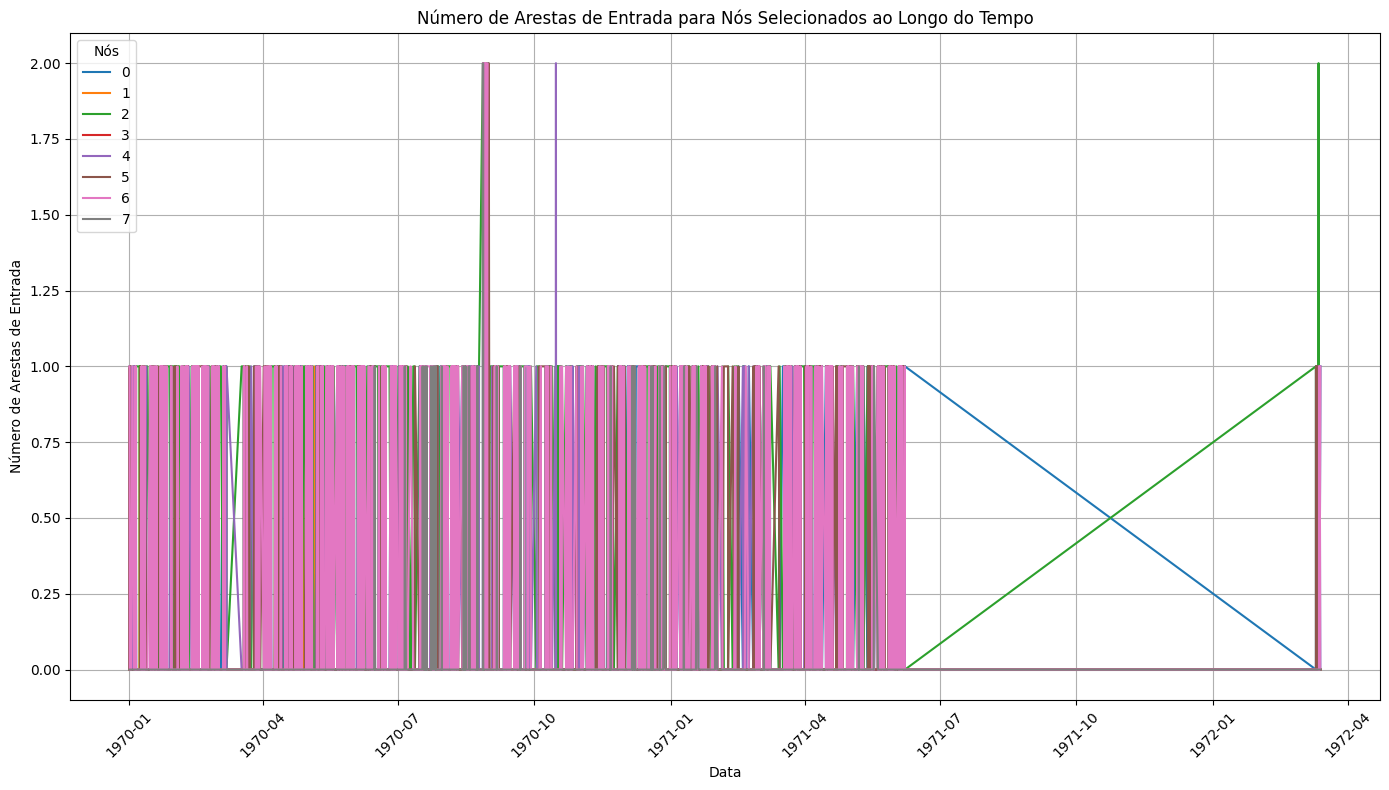

In [ ]:
plot_in_edges_over_time(email_data, max_in_degree_nodes)

# 7. Análise de Séries Temporais
Escolha dois nós (A e B) da questão 5 e decomponha a série temporal correspondente em tendência, sazonalidade e ruído. Compare as tendências e sazonalidades entre

In [ ]:
# Função para decompor a série temporal de um nó específico
def decompose_time_series(df, node, freq='D', model='additive'):
    """
    Decompõe uma série temporal de um nó específico em tendência, sazonalidade e resíduos.

    Parâmetros:
        df (DataFrame): DataFrame com dados do grafo contendo colunas 'timestamp' e 'target'.
        node (str ou int): O nó alvo para análise de série temporal.
        freq (str): Frequência da série temporal, 'D' para diária, 'W' para semanal, etc.
        model (str): Tipo de modelo para decomposição ('additive' ou 'multiplicative').

    Retorna:
        None (exibe o gráfico da decomposição)
    """
    # Converter a coluna de timestamp para datetime, caso não esteja no formato datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

    # Filtrar os dados para o nó especificado
    node_data = df[df['target'] == node].set_index('timestamp').resample(freq).size()

    # Decompor a série temporal do nó
    decomposition = seasonal_decompose(node_data, model=model, period=7)  # 'period' pode ser ajustado conforme necessário

    # Plotar os componentes da decomposição
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
    decomposition.observed.plot(ax=ax1)
    ax1.set_ylabel('Observado')
    decomposition.trend.plot(ax=ax2)
    ax2.set_ylabel('Tendência')
    decomposition.seasonal.plot(ax=ax3)
    ax3.set_ylabel('Sazonalidade')
    decomposition.resid.plot(ax=ax4)
    ax4.set_ylabel('Resíduo')

    plt.suptitle(f'Decomposição da Série Temporal para o Nó {node}', y=1.02)
    plt.xlabel('Tempo')
    plt.tight_layout()
    plt.show()



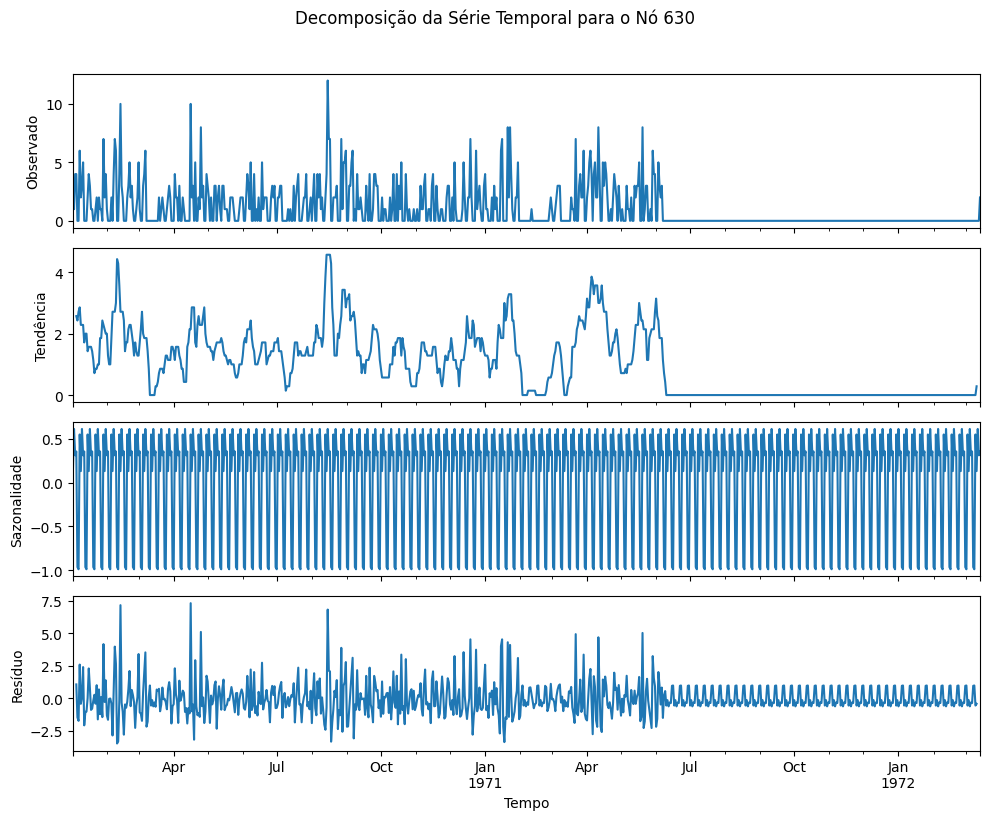

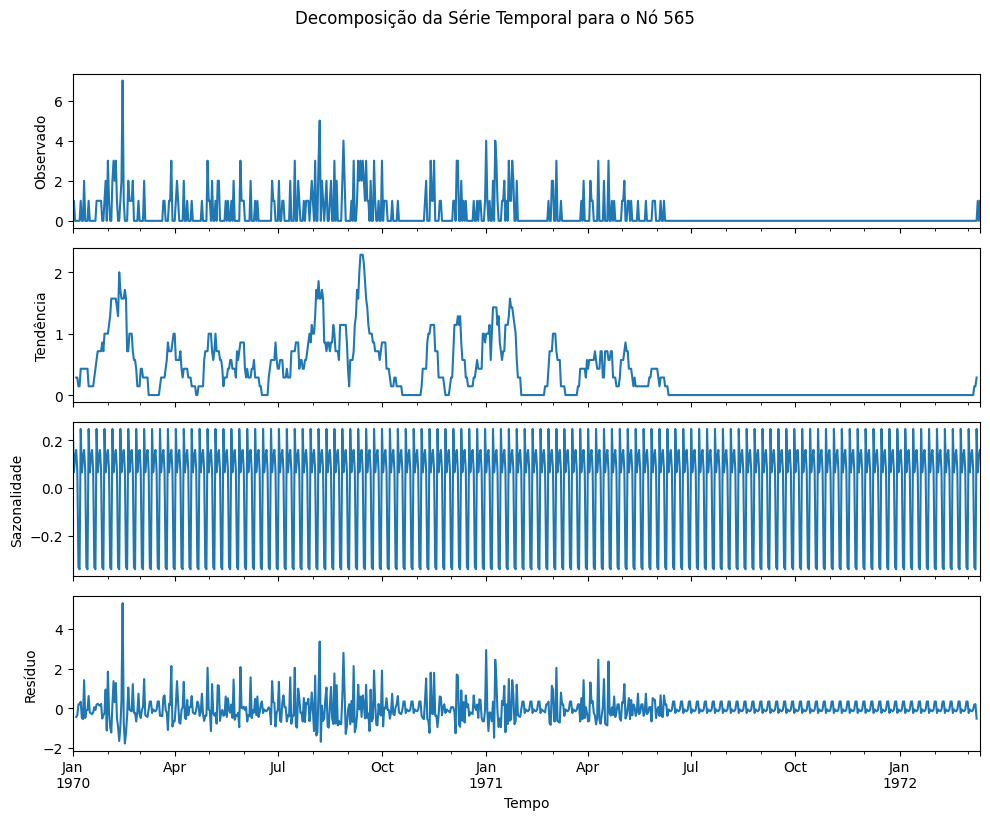

In [ ]:
# Decompor as séries temporais para os nós com maior grau de centralidade de chegada nas comunidades 0 e 1
decomposition_A = decompose_time_series(email_data, max_in_degree_nodes[0], freq='D', model='additive')  # Nó da Comunidade 0
decomposition_B = decompose_time_series(email_data, max_in_degree_nodes[1], freq='D', model='additive')  # Nó da Comunidade 1

# 8. Mudança de Comportamento
Suponha que a instituição deseja alterar o fluxo de e-mails para reduzir a demanda em A e B. Para isso, crie um novo nó na rede, denominado C. Aleatoriamente, selecione 25% das arestas que vão de i para A (ou seja, arestas do tipo (i, A)) e substitua A por C, resultando em arestas do tipo (i, C). Repita o mesmo processo para as arestas que vão de i para B, substituindo 25% dessas arestas por (i, C).

In [ ]:
def dataframe_to_graph(df):
    """
    Converte um DataFrame para um grafo direcionado `networkx`.
    O DataFrame deve ter duas colunas: 'source' e 'target'.
    """
    graph = nx.DiGraph()
    for _, row in df.iterrows():
        graph.add_edge(row['source'], row['target'])
    return graph

In [ ]:
def redistribute_edges(graph, node_a, node_b, new_node_c, percentage=0.25):
    """
    Redistribui 25% das arestas de entrada dos nós A e B para o novo nó C.

    Parâmetros:
        graph (networkx.Graph): Grafo que representa a rede de e-mails.
        node_a (str ou int): Nó original A.
        node_b (str ou int): Nó original B.
        new_node_c (str ou int): Novo nó C que será adicionado.
        percentage (float): Percentual de arestas que serão redistribuídas (padrão é 0.25, ou 25%).

    Retorna:
        networkx.Graph: O grafo modificado com as novas arestas.
    """
    # Adiciona o novo nó C ao grafo se ele ainda não existir
    if new_node_c not in graph:
        graph.add_node(new_node_c)
        # Função para selecionar e redirecionar 25% das arestas para um novo nó
    def redirect_edges(node):
        incoming_edges = [(i, node) for i in graph.predecessors(node)]
        sample_size = int(len(incoming_edges) * percentage)

        # Seleciona 25% das arestas de entrada
        selected_edges = random.sample(incoming_edges, sample_size)

        # Remove arestas selecionadas e redireciona para C
        for edge in selected_edges:
            graph.remove_edge(edge[0], node)
            graph.add_edge(edge[0], new_node_c)

    # Redistribui arestas de A para C
    redirect_edges(node_a)

    # Redistribui arestas de B para C
    redirect_edges(node_b)

    return graph

In [ ]:
# Exemplo de uso
# Suponha que o `DataFrame` original seja chamado `email_data`, com colunas 'source' e 'target'
email_graph = dataframe_to_graph(email_data)
# No exemplo, `max_in_degree_nodes[0]` e `max_in_degree_nodes[1]` representam os nós A e B
email_graph = redistribute_edges(email_graph, max_in_degree_nodes[0], max_in_degree_nodes[1], 'C')

# 9. Análise da Mudança
Repita o mesmo procedimento da questão 7 para os nós A, B e C.

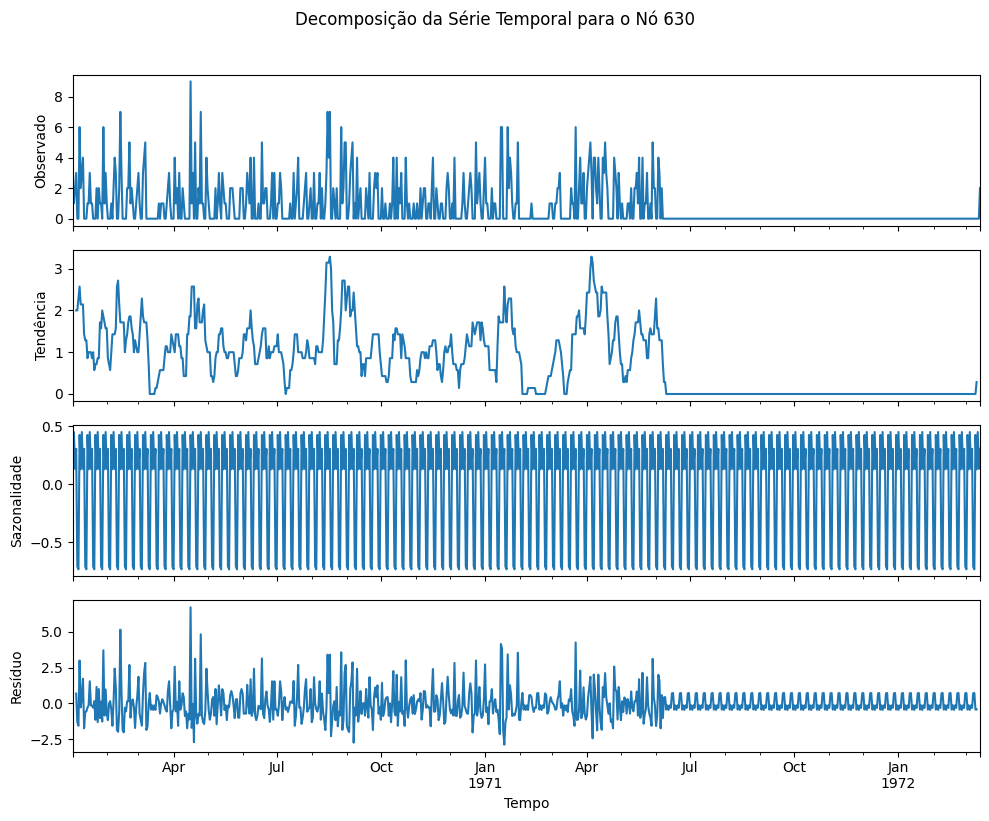

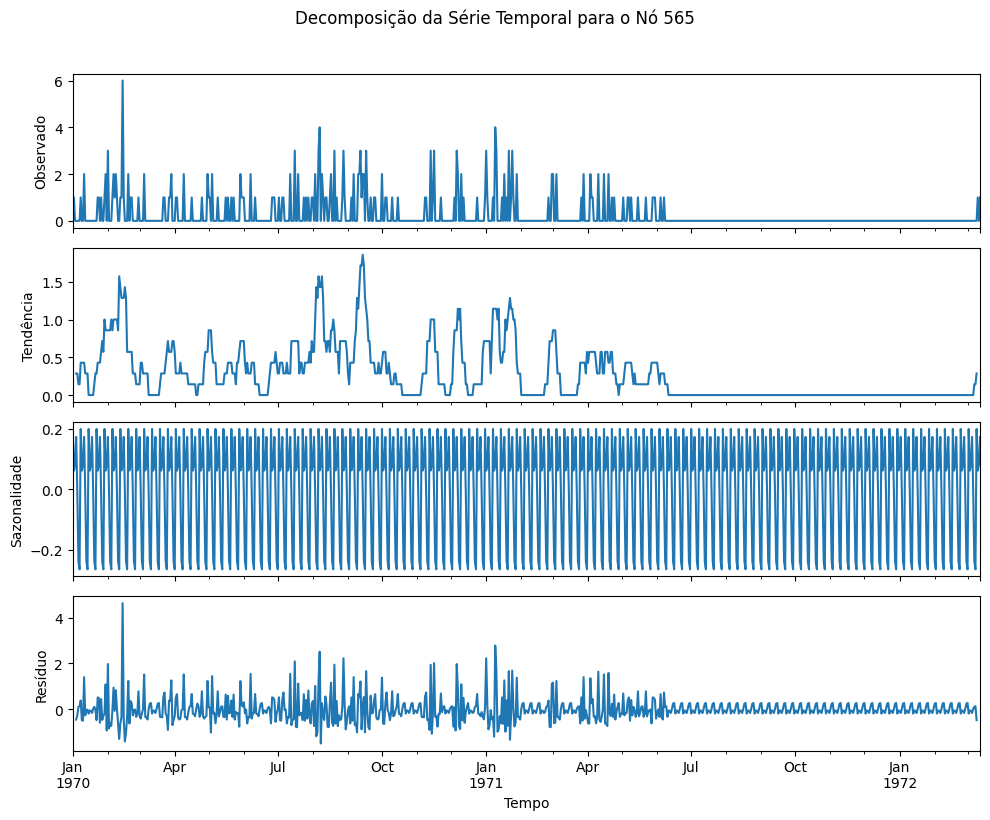

In [ ]:
# Decompor as séries temporais para os nós com maior grau de centralidade de chegada nas comunidades 0 e 1
decomposition_A = decompose_time_series(email_data, max_in_degree_nodes[0], freq='D', model='additive')  # Nó da Comunidade 0
decomposition_B = decompose_time_series(email_data, max_in_degree_nodes[1], freq='D', model='additive')  # Nó da Comunidade 1

# 10. Tomada de Decisão baseada em Rede Social
● Com base nas observações feitas na questão anterior, é possível
afirmar se o fluxo de chegadas de e-mails em A e B sofreu alterações?

● Utilize as métricas de redes sociais discutidas anteriormente e aplique
testes de hipóteses para fundamentar matematicamente a sua
conclusão.

In [ ]:
def get_email_flow_metrics(graph, node):
  in_degree = graph.in_degree(node)
  out_degree = graph.out_degree(node)
  return in_degree, out_degree

In [ ]:
def hypothesis_testing(before, after):
  # Teste t para comparar os fluxos de e-mails antes e depois
  t_statistic, p_value = stats.ttest_ind(before, after)
  return t_statistic, p_value

In [ ]:
# Métricas antes da redistribuição
metrics_before = {node: get_email_flow_metrics(email_graph, node) for node in [max_in_degree_nodes[0], max_in_degree_nodes[1]]}

# Redistribuir arestas
email_graph = redistribute_edges(email_graph, max_in_degree_nodes[0], max_in_degree_nodes[1], 'C')

# Métricas após a redistribuição
metrics_after = {node: get_email_flow_metrics(email_graph, node) for node in [max_in_degree_nodes[0], max_in_degree_nodes[1]]}

# Extraindo os valores dos graus de entrada para comparação
before_in_degrees = [metrics_before[node][0] for node in metrics_before]
after_in_degrees = [metrics_after[node][0] for node in metrics_after]

# Executar teste de hipóteses
t_statistic, p_value = hypothesis_testing(before_in_degrees, after_in_degrees)

# Exibir resultados
print("Métricas antes da redistribuição:")
print(metrics_before)
print("Métricas após a redistribuição:")
print(metrics_after)
print(f"Estatística t: {t_statistic}, p-valor: {p_value}")

# Análise do p-valor
alpha = 0.05  # nível de significância
if p_value < alpha:
    print("Rejeitamos a hipótese nula: há evidências suficientes para afirmar que o fluxo de e-mails em A e B sofreu alterações.")
else:
    print("Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que o fluxo de e-mails em A e B sofreu alterações.")

Métricas antes da redistribuição:
{630: (44, 78), 565: (27, 36)}
Métricas após a redistribuição:
{630: (33, 78), 565: (21, 36)}
Estatística t: 0.8169678632647616, p-valor: 0.4997835966139753
Não rejeitamos a hipótese nula: não há evidências suficientes para afirmar que o fluxo de e-mails em A e B sofreu alterações.
